# Sprint 5. Task M5 T02

## Mustafa Habibi


### Exercise 1
Start the attached data set in train and test. Study the two sets separately, at a descriptive level.

Also attached you will find a description of the different variables of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('housing data.csv', header= None)


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10.TAX       full-value property-tax rate per $10,000
11.PTRATIO   pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.shape

(506, 14)

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


C:\Users\mhabi\AppData\Local\Temp\ipykernel_3324\4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\mhabi\AppData\Local\Temp\ipykernel_3324\4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\mhabi\AppData\Local\Temp\ip

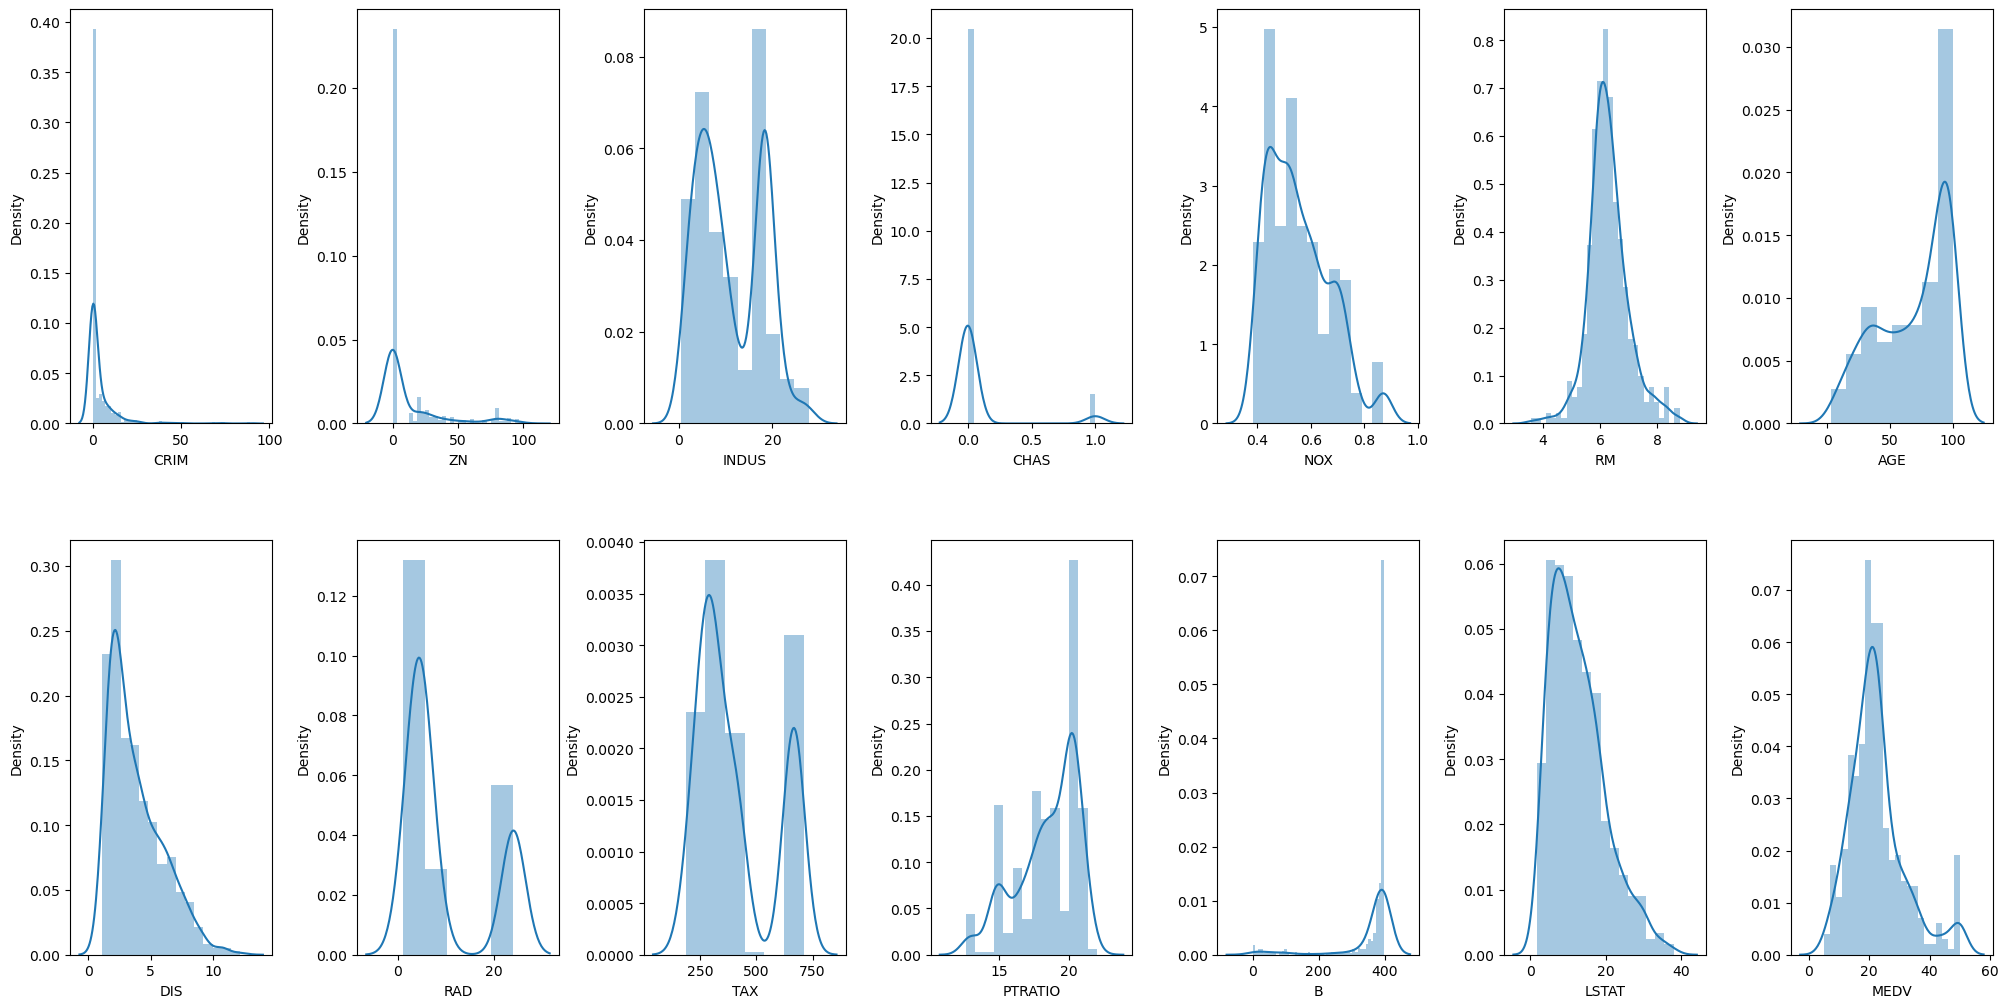

In [12]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

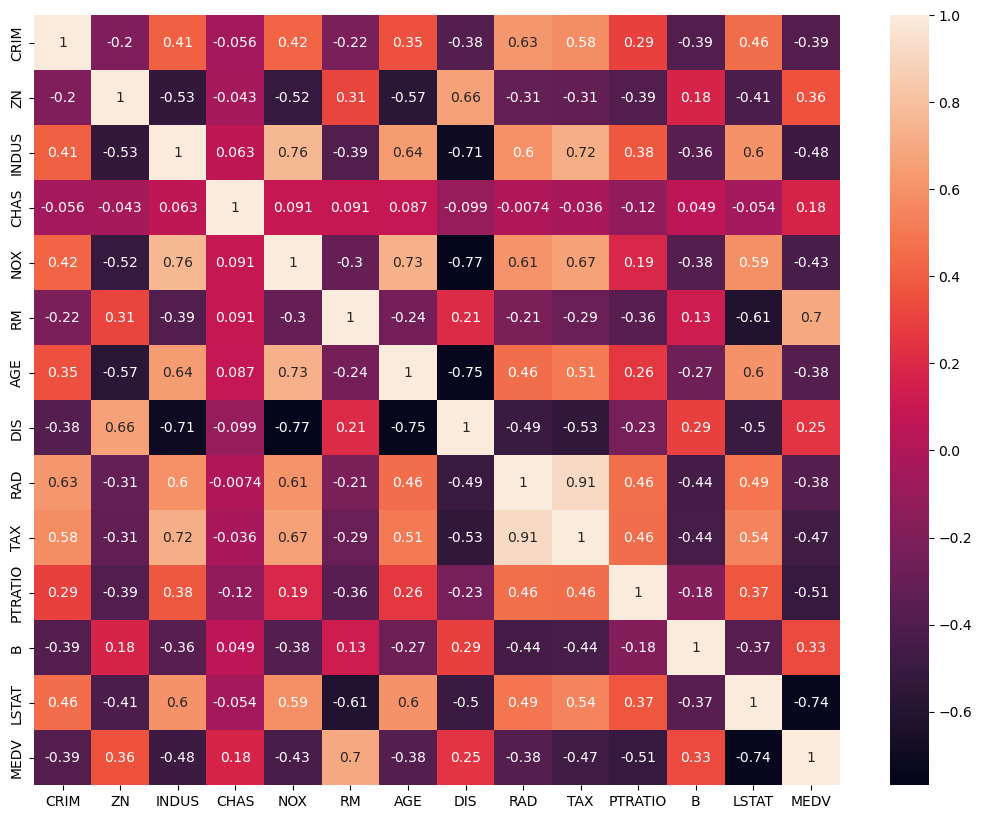

In [13]:
plt.figure(figsize=(13, 10))

sns.heatmap(df.corr(), annot=True)
plt.show()

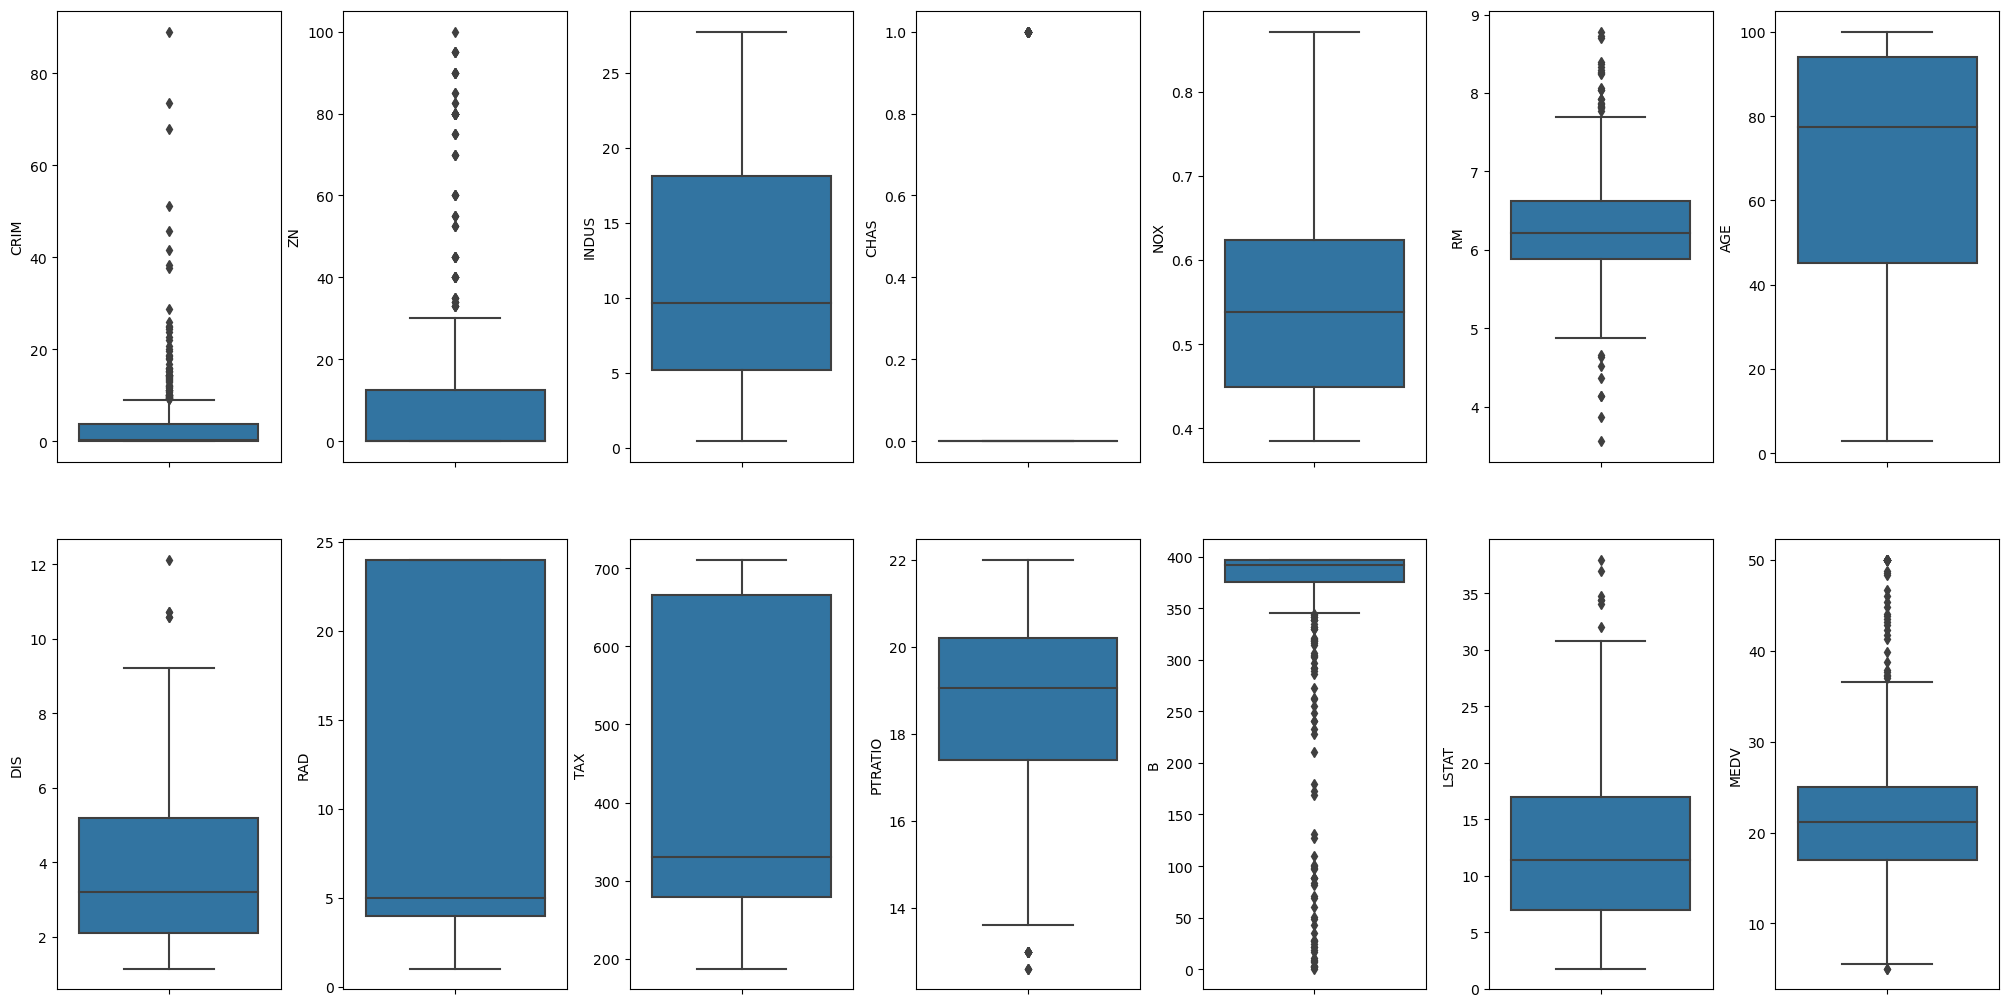

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

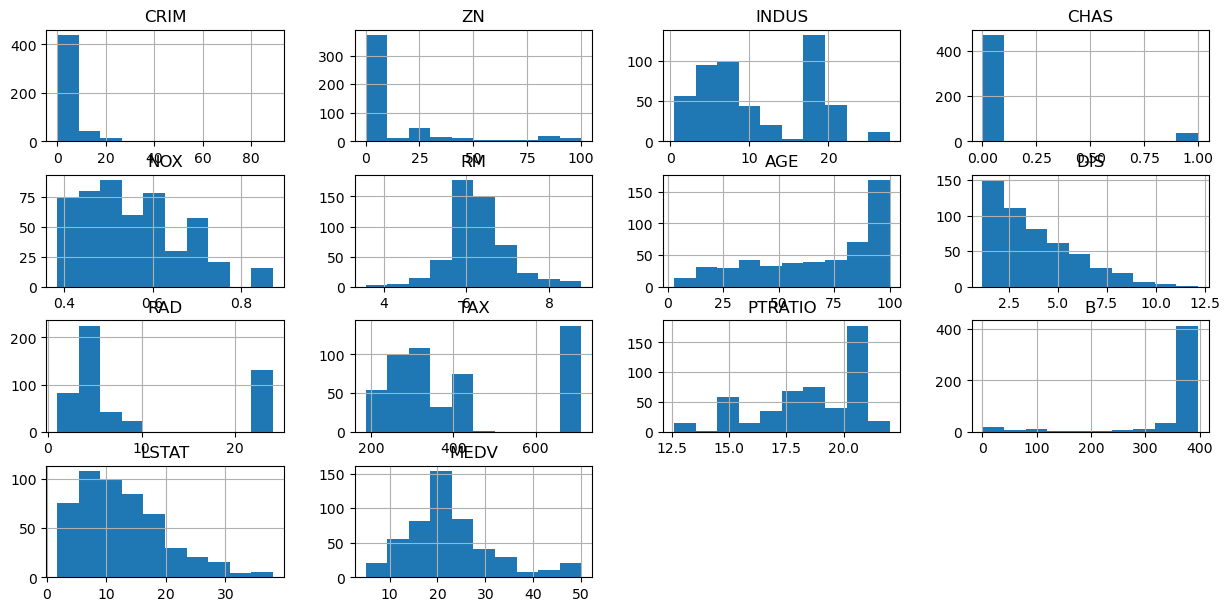

In [15]:

df.hist(layout=(5,4), figsize=(15,9))

plt.show()

In [16]:
train, test = train_test_split(df, test_size=0.20, random_state=4)

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.714276,8.497258,0.00632,0.079980,0.26266,3.896877,88.9762
ZN,404.0,10.996287,22.941789,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,404.0,11.085347,6.870004,0.74000,5.130000,9.69000,18.100000,27.7400
CHAS,404.0,0.061881,0.241238,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,404.0,0.557086,0.117656,0.38500,0.449000,0.53800,0.647000,0.8710
RM,404.0,6.272166,0.712302,3.56100,5.886500,6.20850,6.607000,8.7800
AGE,404.0,68.894307,28.096077,2.90000,45.675000,77.50000,93.925000,100.0000
DIS,404.0,3.787746,2.135045,1.12960,2.087875,3.14230,5.141475,12.1265
RAD,404.0,9.784653,8.818302,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,404.0,413.091584,170.053776,187.00000,281.000000,334.50000,666.000000,711.0000


In [18]:
train.shape

(404, 14)

In [19]:
train.size

5656

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 192 to 122
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 47.3 KB


In [21]:
train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.205195,0.426618,-0.045982,0.429440,-0.242419,0.363703,-0.391727,0.633948,0.591113,0.298431,-0.304146,0.482907,-0.406673
ZN,-0.205195,1.000000,-0.521041,-0.029101,-0.510986,0.284054,-0.562212,0.674285,-0.315041,-0.305830,-0.377158,0.164923,-0.400026,0.336494
INDUS,0.426618,-0.521041,1.000000,0.068194,0.766586,-0.381478,0.643167,-0.700065,0.620850,0.745065,0.379649,-0.359682,0.612088,-0.493582
CHAS,-0.045982,-0.029101,0.068194,1.000000,0.113718,0.147985,0.081803,-0.090187,0.017944,-0.010361,-0.118626,0.036505,-0.077014,0.203227
NOX,0.429440,-0.510986,0.766586,0.113718,1.000000,-0.297498,0.732916,-0.769903,0.620102,0.669589,0.186440,-0.369939,0.592362,-0.425840
RM,-0.242419,0.284054,-0.381478,0.147985,-0.297498,1.000000,-0.227922,0.195834,-0.240947,-0.314970,-0.351499,0.142269,-0.619522,0.701820
AGE,0.363703,-0.562212,0.643167,0.081803,0.732916,-0.227922,1.000000,-0.762096,0.462899,0.505121,0.249802,-0.261413,0.597940,-0.370941
DIS,-0.391727,0.674285,-0.700065,-0.090187,-0.769903,0.195834,-0.762096,1.000000,-0.501121,-0.531960,-0.215367,0.275859,-0.510049,0.247688
RAD,0.633948,-0.315041,0.620850,0.017944,0.620102,-0.240947,0.462899,-0.501121,1.000000,0.911198,0.473095,-0.426908,0.510711,-0.412563
TAX,0.591113,-0.305830,0.745065,-0.010361,0.669589,-0.314970,0.505121,-0.531960,0.911198,1.000000,0.462434,-0.425606,0.569035,-0.498500


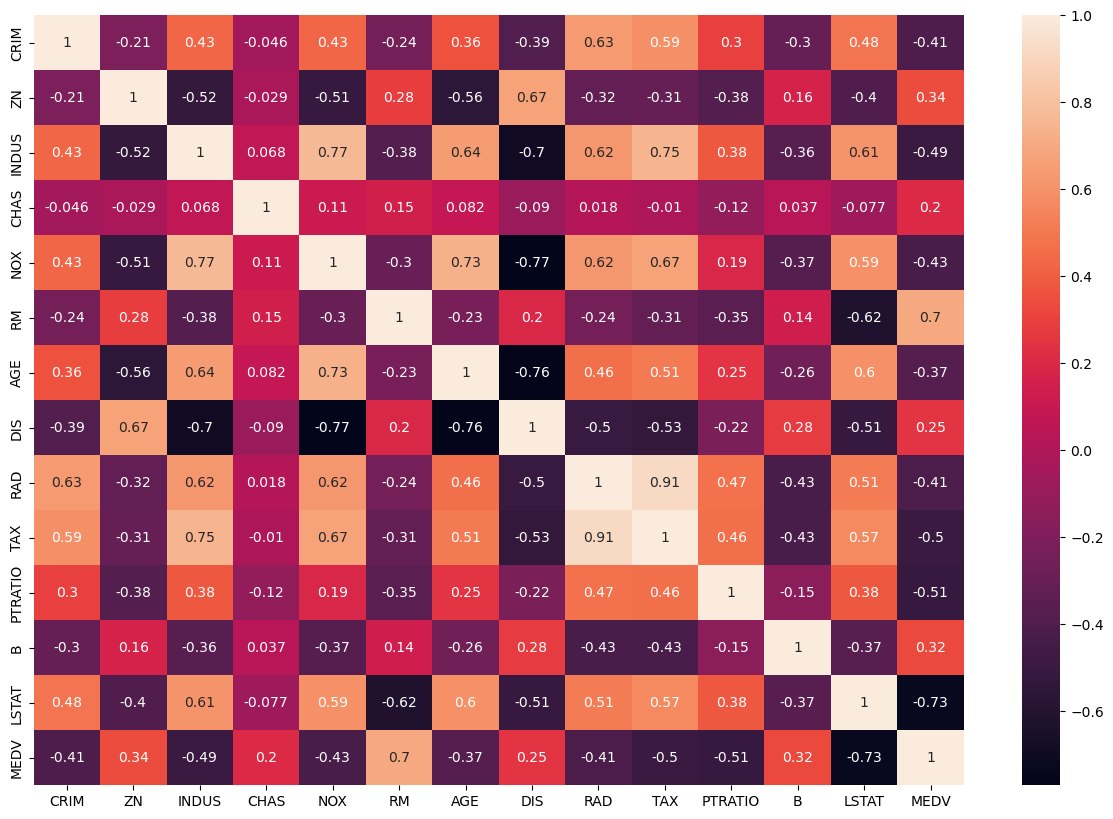

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [23]:
test.shape

(102, 14)

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 8 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 12.0 KB


In [25]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,3.214466,9.035087,0.01301,0.090897,0.23536,1.965348,73.5341
ZN,102.0,12.818627,24.837770,0.00000,0.000000,0.00000,16.250000,95.0000
INDUS,102.0,11.340490,6.851950,0.46000,6.200000,9.90000,18.100000,27.7400
CHAS,102.0,0.098039,0.298836,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,102.0,0.545226,0.108582,0.39200,0.449250,0.52400,0.605000,0.8710
RM,102.0,6.334020,0.663926,4.90300,5.881250,6.22600,6.716000,8.3370
AGE,102.0,67.309804,28.460939,6.60000,42.350000,77.25000,94.400000,100.0000
DIS,102.0,3.823943,1.995116,1.33250,2.203050,3.39480,5.202825,9.2229
RAD,102.0,8.617647,8.228235,1.00000,4.000000,5.00000,8.000000,24.0000
TAX,102.0,389.009804,161.769454,188.00000,277.000000,307.00000,437.000000,711.0000


In [26]:
test.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [27]:
test.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.181526,0.334268,-0.081437,0.387445,-0.124315,0.310819,-0.333545,0.594925,0.551621,0.257087,-0.664753,0.347444,-0.321164
ZN,-0.181526,1.000000,-0.586213,-0.090956,-0.541308,0.421467,-0.595862,0.631828,-0.297100,-0.344978,-0.445662,0.215155,-0.463538,0.438867
INDUS,0.334268,-0.586213,1.000000,0.043930,0.759983,-0.440501,0.654049,-0.744383,0.495103,0.630279,0.399521,-0.347461,0.574963,-0.454540
CHAS,-0.081437,-0.090956,0.043930,1.000000,0.027381,-0.110096,0.108964,-0.135732,-0.081243,-0.107954,-0.130121,0.091144,0.032481,0.082722
NOX,0.387445,-0.541308,0.759983,0.027381,1.000000,-0.318258,0.727218,-0.768330,0.566764,0.657298,0.197542,-0.431904,0.580646,-0.431026
RM,-0.124315,0.421467,-0.440501,-0.110096,-0.318258,1.000000,-0.290022,0.247747,-0.058949,-0.181421,-0.371661,0.079309,-0.585022,0.672316
AGE,0.310819,-0.595862,0.654049,0.108964,0.727218,-0.290022,1.000000,-0.690203,0.425941,0.511070,0.306810,-0.321040,0.620608,-0.396892
DIS,-0.333545,0.631828,-0.744383,-0.135732,-0.768330,0.247747,-0.690203,1.000000,-0.466686,-0.548328,-0.306131,0.356713,-0.438425,0.260565
RAD,0.594925,-0.297100,0.495103,-0.081243,0.566764,-0.058949,0.425941,-0.466686,1.000000,0.904511,0.428514,-0.527903,0.383263,-0.252088
TAX,0.551621,-0.344978,0.630279,-0.107954,0.657298,-0.181421,0.511070,-0.548328,0.904511,1.000000,0.453790,-0.518606,0.427702,-0.345777


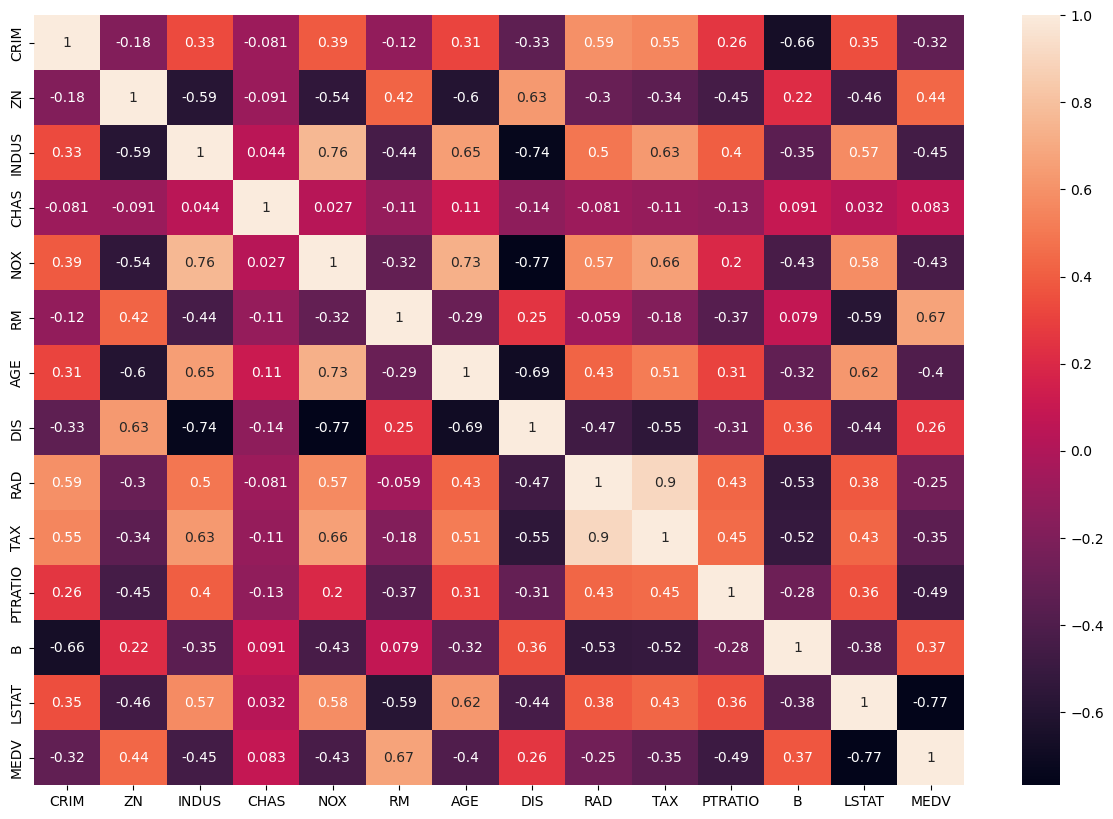

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(test.corr(), annot=True)
plt.show()

In [29]:
df.size

7084

In [30]:
df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

In [31]:
train.std()

CRIM         8.497258
ZN          22.941789
INDUS        6.870004
CHAS         0.241238
NOX          0.117656
RM           0.712302
AGE         28.096077
DIS          2.135045
RAD          8.818302
TAX        170.053776
PTRATIO      2.171029
B           89.476355
LSTAT        7.225008
MEDV         9.067071
dtype: float64

In [32]:
test.std()

CRIM         9.035087
ZN          24.837770
INDUS        6.851950
CHAS         0.298836
NOX          0.108582
RM           0.663926
AGE         28.460939
DIS          1.995116
RAD          8.228235
TAX        161.769454
PTRATIO      2.149821
B           98.496089
LSTAT        6.806263
MEDV         9.685500
dtype: float64

### Exercise 2
Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).

### I would like to preprocess four columns (CRIM, DIS,  MEDV and NOX)

In [35]:
from scipy.stats import shapiro

stat, p = shapiro(train.CRIM)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.469, p=0.000
El p-value es: 6.829902827553749e-33
-------------
Probably not Gaussian


<AxesSubplot:xlabel='CRIM'>

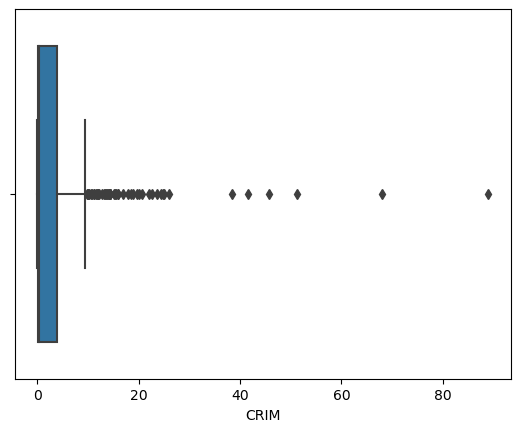

In [36]:
sns.boxplot(x= 'CRIM', data= train)

In [37]:
trans = preprocessing.RobustScaler()
train[['CRIM']] = trans.fit_transform(train[['CRIM']])
train.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
192,-0.046116,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398.0,15.2,390.49,2.87,36.4
138,-0.003369,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437.0,21.2,392.04,21.32,13.3
251,-0.012725,22.0,5.86,0,0.431,6.438,8.9,7.3967,7,330.0,19.1,377.07,3.59,24.8
13,0.096178,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307.0,21.0,396.90,8.26,20.4
256,-0.064786,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244.0,15.9,386.34,3.11,44.0
299,-0.054246,70.0,2.24,0,0.400,7.041,10.0,7.8278,5,358.0,14.8,371.58,4.74,29.0
180,-0.051555,0.0,2.46,0,0.488,7.765,83.3,2.7410,3,193.0,17.8,395.56,7.56,39.8


In [38]:
stat, p = shapiro(train.DIS)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.899, p=0.000
El p-value es: 9.544712415587462e-16
-------------
Probably not Gaussian


<AxesSubplot:xlabel='DIS'>

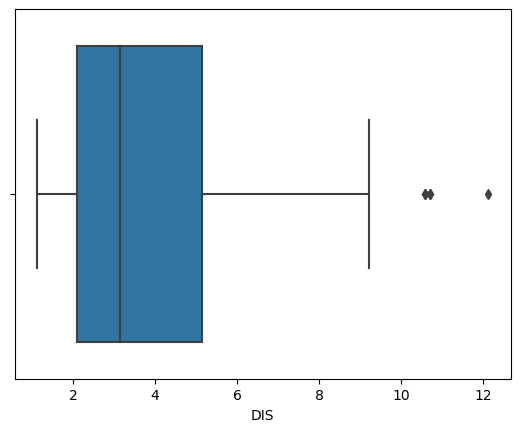

In [39]:
sns.boxplot(x= 'DIS', data= train)

In [40]:
trans = preprocessing.RobustScaler()
train[['DIS']] = trans.fit_transform(train[['DIS']])
train.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
192,-0.046116,45.0,3.44,0,0.437,7.178,26.3,1.092972,5,398.0,15.2,390.49,2.87,36.4
138,-0.003369,0.0,21.89,0,0.624,5.857,98.2,-0.482611,4,437.0,21.2,392.04,21.32,13.3
251,-0.012725,22.0,5.86,0,0.431,6.438,8.9,1.393241,7,330.0,19.1,377.07,3.59,24.8
13,0.096178,0.0,8.14,0,0.538,5.949,61.8,0.512575,4,307.0,21.0,396.90,8.26,20.4
256,-0.064786,90.0,3.75,0,0.394,7.454,34.2,1.045913,3,244.0,15.9,386.34,3.11,44.0
299,-0.054246,70.0,2.24,0,0.400,7.041,10.0,1.534418,5,358.0,14.8,371.58,4.74,29.0
180,-0.051555,0.0,2.46,0,0.488,7.765,83.3,-0.131419,3,193.0,17.8,395.56,7.56,39.8


In [41]:
stat, p = shapiro(train.NOX)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El p-value es:', p)

print('-------------')

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.935, p=0.000
El p-value es: 2.7458731902824107e-12
-------------
Probably not Gaussian


<AxesSubplot:xlabel='NOX'>

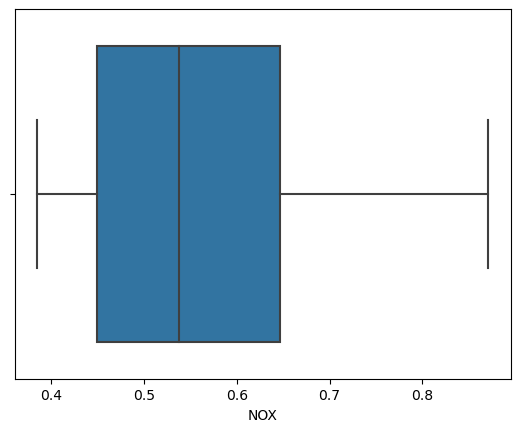

In [42]:
sns.boxplot(x= 'NOX', data= train)

In [43]:
trans = preprocessing.MinMaxScaler()
train[['NOX']] = trans.fit_transform(train[['NOX']])

train.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
192,-0.046116,45.0,3.44,0,0.106996,7.178,26.3,1.092972,5,398.0,15.2,390.49,2.87,36.4
138,-0.003369,0.0,21.89,0,0.491770,5.857,98.2,-0.482611,4,437.0,21.2,392.04,21.32,13.3
251,-0.012725,22.0,5.86,0,0.094650,6.438,8.9,1.393241,7,330.0,19.1,377.07,3.59,24.8
13,0.096178,0.0,8.14,0,0.314815,5.949,61.8,0.512575,4,307.0,21.0,396.90,8.26,20.4
256,-0.064786,90.0,3.75,0,0.018519,7.454,34.2,1.045913,3,244.0,15.9,386.34,3.11,44.0
299,-0.054246,70.0,2.24,0,0.030864,7.041,10.0,1.534418,5,358.0,14.8,371.58,4.74,29.0
180,-0.051555,0.0,2.46,0,0.211934,7.765,83.3,-0.131419,3,193.0,17.8,395.56,7.56,39.8


In [44]:
data = {'AGE': [20, 40, 60, 80, 100]}
bins = [20, 40, 60, 80, 100]
labels = ['new', 'semi_new', 'old', 'very_old'] 


df['AGE'] = pd.cut(df['AGE'], bins=bins, labels=False, right=False)


dummy_df = pd.get_dummies(df['AGE'])
dummy_df = dummy_df.astype(int)
df_with_dummies = pd.concat([df, dummy_df], axis=1)

df_with_dummies

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,0.0,1.0,2.0,3.0
0,0.00632,18.0,2.31,0,0.538,6.575,2.0,4.0900,1,296.0,15.3,396.90,4.98,24.0,0,0,1,0
1,0.02731,0.0,7.07,0,0.469,6.421,2.0,4.9671,2,242.0,17.8,396.90,9.14,21.6,0,0,1,0
2,0.02729,0.0,7.07,0,0.469,7.185,2.0,4.9671,2,242.0,17.8,392.83,4.03,34.7,0,0,1,0
3,0.03237,0.0,2.18,0,0.458,6.998,1.0,6.0622,3,222.0,18.7,394.63,2.94,33.4,0,1,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,1.0,6.0622,3,222.0,18.7,396.90,5.33,36.2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,2.0,2.4786,1,273.0,21.0,391.99,9.67,22.4,0,0,1,0
502,0.04527,0.0,11.93,0,0.573,6.120,2.0,2.2875,1,273.0,21.0,396.90,9.08,20.6,0,0,1,0
503,0.06076,0.0,11.93,0,0.573,6.976,3.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0,0,0,1
504,0.10959,0.0,11.93,0,0.573,6.794,3.0,2.3889,1,273.0,21.0,393.45,6.48,22.0,0,0,0,1


## Exercise 3
It summarizes the newly generated columns statistically and graphically

In exercise 2, I preprocessed CRIM, DIS, MEDV and NOX

In [59]:
train['CRIM'].mean()

0.9042987643941989

In [52]:
test['CRIM'].mean()

3.214466078431372

In [53]:
df['CRIM'].mean()

3.613523557312254

In [58]:
train['CRIM'].describe().T

count    4.040000e+02
mean     9.042988e-01
std      2.226221e+00
min     -6.715926e-02
25%     -4.786086e-02
50%     -7.264155e-18
75%      9.521391e-01
max      2.324232e+01
Name: CRIM, dtype: float64

In [56]:
test['CRIM'].describe().T

count    102.000000
mean       3.214466
std        9.035087
min        0.013010
25%        0.090897
50%        0.235360
75%        1.965348
max       73.534100
Name: CRIM, dtype: float64

In [61]:
train['DIS'].describe().T

count    4.040000e+02
mean     2.113722e-01
std      6.991894e-01
min     -6.591237e-01
25%     -3.453055e-01
50%      7.285839e-17
75%      6.546945e-01
max      2.942167e+00
Name: DIS, dtype: float64

In [62]:
test['DIS'].describe().T

count    102.000000
mean       3.823943
std        1.995116
min        1.332500
25%        2.203050
50%        3.394800
75%        5.202825
max        9.222900
Name: DIS, dtype: float64

In [63]:
df['DIS'].describe().T

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

In [48]:
train['DIS'].mean()

0.211372163873448

In [64]:
test['DIS'].mean()

3.823943137254902

In [46]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [67]:
train['MEDV'].mean()

22.298267326732674

In [68]:
test['MEDV'].mean()

23.461764705882352

In [69]:
df['MEDV'].mean()

22.532806324110677

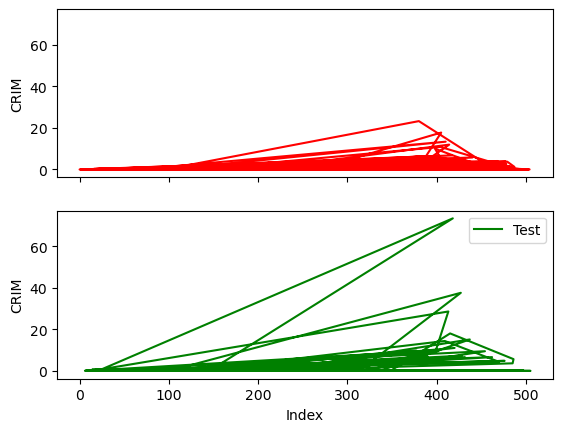

In [91]:
train_column = train['CRIM']  
test_column = test['CRIM'] 

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)

ax1.plot(train_column, color='Red', label='Train')
ax1.set_ylabel('CRIM')

ax2.plot(test_column, color='green', label='Test')
ax2.set_ylabel('CRIM')  
ax2.set_xlabel('Index')

plt.legend()
plt.show()

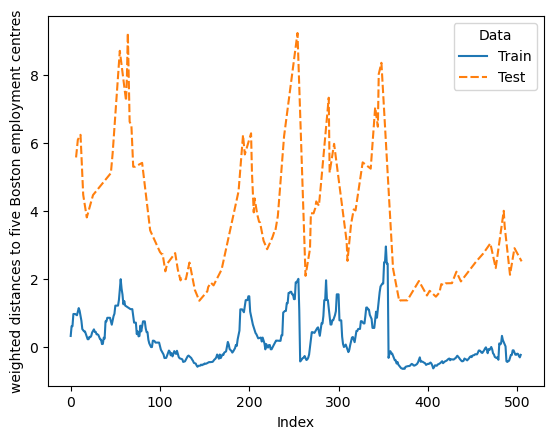

In [92]:
train_column = train['DIS']
test_column = test['DIS']

combined_df = pd.concat([train_column, test_column], keys=['Train', 'Test'], axis=1)

sns.lineplot(data=combined_df)

plt.xlabel('Index')
plt.ylabel('weighted distances to five Boston employment centres') 
plt.legend(title='Data') 

plt.show()

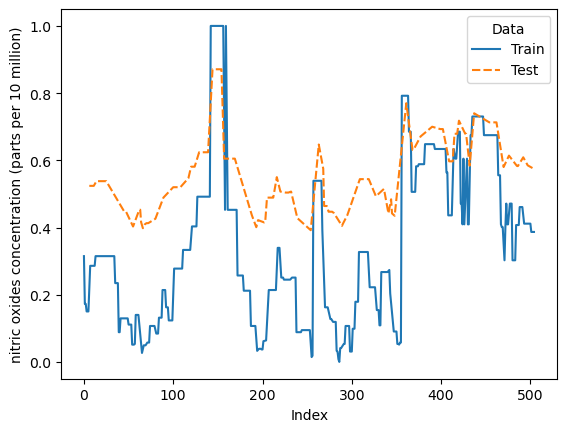

In [93]:
train_column = train['NOX']
test_column = test['NOX']

combined_df = pd.concat([train_column, test_column], keys=['Train', 'Test'], axis=1)

sns.lineplot(data=combined_df)

plt.xlabel('Index')
plt.ylabel('nitric oxides concentration (parts per 10 million)') 
plt.legend(title='Data')  

plt.show()

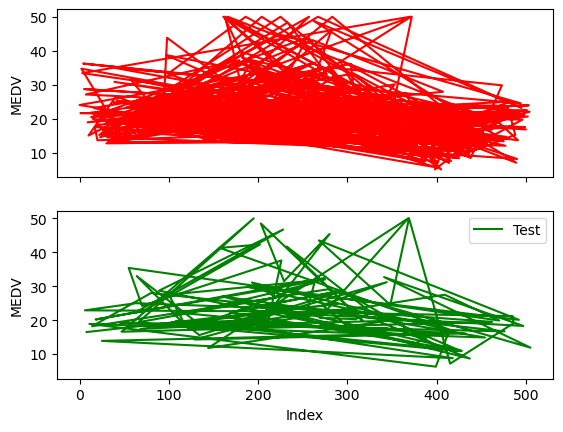

In [80]:
train_column = train['MEDV']
test_column = test['MEDV']

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)

ax1.plot(train_column, color='Red', label='Train')
ax1.set_ylabel('MEDV')

ax2.plot(test_column, color='green', label='Test')
ax2.set_ylabel('MEDV') 
ax2.set_xlabel('Index')

plt.legend()
plt.show()

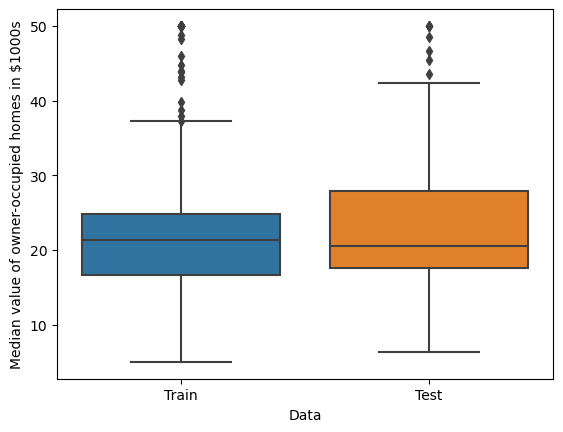

In [102]:
train_column = train['MEDV'] 
test_column = test['MEDV']  

combined_df = pd.concat([train_column, test_column], keys=['Train', 'Test'], axis=1)

combined_df = combined_df.melt(var_name='Data', value_name='Value')

sns.boxplot(x='Data', y='Value', data=combined_df)

plt.xlabel('Data')
plt.ylabel('Median value of owner-occupied homes in $1000s')

plt.show()

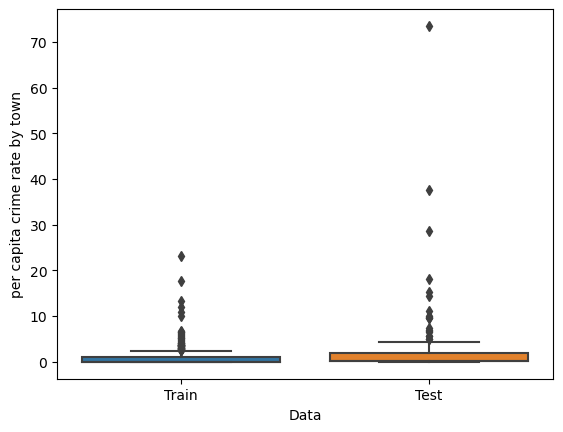

In [100]:
train_column = train['CRIM'] 
test_column = test['CRIM']  

combined_df = pd.concat([train_column, test_column], keys=['Train', 'Test'], axis=1)

combined_df = combined_df.melt(var_name='Data', value_name='Value')

sns.boxplot(x='Data', y='Value', data=combined_df)

plt.xlabel('Data')
plt.ylabel('per capita crime rate by town')

plt.show()

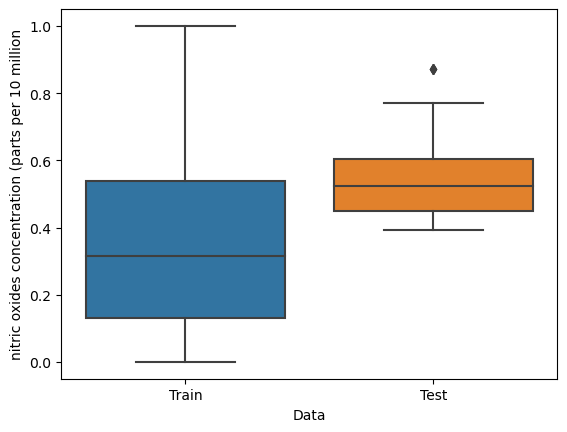

In [87]:
train_column = train['NOX'] 
test_column = test['NOX'] 

combined_df = pd.concat([train_column, test_column], keys=['Train', 'Test'], axis=1)

combined_df = combined_df.melt(var_name='Data', value_name='Value')

sns.boxplot(x='Data', y='Value', data=combined_df)

plt.xlabel('Data')
plt.ylabel('nitric oxides concentration (parts per 10 million')

plt.show()

In [103]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,2.0,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,2.0,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,2.0,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,1.0,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,1.0,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,2.0,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,2.0,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,3.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,3.0,2.3889,1,273.0,21.0,393.45,6.48,22.0
